Refactored

In [53]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tqdm.pandas()
ema_length = 60

tradingData = pd.read_csv("../data/^ixic-1d-1y.csv")
tradingData.Date = pd.to_datetime(tradingData.Date, utc=True)
tradingData=tradingData[tradingData.High != tradingData.Low]
tradingData.set_index('Date', inplace=True)
tradingData.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
tradingData

Open          High           Low  \
Date                                                                  
2023-04-20 04:00:00+00:00  12039.080078  12155.959961  12011.950195   
2023-04-21 04:00:00+00:00  12046.030273  12097.150391  11986.820312   
2023-04-24 04:00:00+00:00  12053.469727  12103.580078  11960.299805   
2023-04-25 04:00:00+00:00  11968.809570  11990.459961  11798.769531   
2023-04-26 04:00:00+00:00  11913.230469  11967.990234  11833.070312   
...                                 ...           ...           ...   
2024-04-15 04:00:00+00:00  16276.469727  16295.269531  15863.879883   
2024-04-16 04:00:00+00:00  15856.379883  15965.790039  15822.019531   
2024-04-17 04:00:00+00:00  15942.290039  15957.030273  15654.509766   
2024-04-18 04:00:00+00:00  15705.690430  15786.120117  15587.500000   
2024-04-19 04:00:00+00:00  15547.099609  15576.700195  15222.780273   

                                  Close  
Date                                     
2023-04-20 04:00:00+00:00  12059.559570  
2023-04-21 04:00:00+00:00  12072.459961  
2023-04-24 04:00:00+00:00  12037.200195  
2023-04-25 04:00:00+00:00  11799.160156  
2023-04-26 04:00:00+00:00  11854.349609  
...                                 ...  
2024-04-15 04:00:00+00:00  15885.019531  
2024-04-16 04:00:00+00:00  15865.250000  
2024-04-17 04:00:00+00:00  15683.370117  
2024-04-18 04:00:00+00:00  15601.500000  
2024-04-19 04:00:00+00:00  15282.009766  

[252 rows x 4 columns]

In [54]:
tradingData['EMA'] = ta.ema(tradingData.Close, length=ema_length)
macd = ta.macd(tradingData.Close)
macd

tradingData['MACD'] = macd.loc[:, 'MACD_12_26_9']
tradingData['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
tradingData['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']
tradingData['ATR'] = ta.atr(tradingData.High, tradingData.Low, tradingData.Close, length=7)
tradingData

Open          High           Low  \
Date                                                                  
2023-04-20 04:00:00+00:00  12039.080078  12155.959961  12011.950195   
2023-04-21 04:00:00+00:00  12046.030273  12097.150391  11986.820312   
2023-04-24 04:00:00+00:00  12053.469727  12103.580078  11960.299805   
2023-04-25 04:00:00+00:00  11968.809570  11990.459961  11798.769531   
2023-04-26 04:00:00+00:00  11913.230469  11967.990234  11833.070312   
...                                 ...           ...           ...   
2024-04-15 04:00:00+00:00  16276.469727  16295.269531  15863.879883   
2024-04-16 04:00:00+00:00  15856.379883  15965.790039  15822.019531   
2024-04-17 04:00:00+00:00  15942.290039  15957.030273  15654.509766   
2024-04-18 04:00:00+00:00  15705.690430  15786.120117  15587.500000   
2024-04-19 04:00:00+00:00  15547.099609  15576.700195  15222.780273   

                                  Close           EMA        MACD  \
Date                                                                
2023-04-20 04:00:00+00:00  12059.559570           NaN         NaN   
2023-04-21 04:00:00+00:00  12072.459961           NaN         NaN   
2023-04-24 04:00:00+00:00  12037.200195           NaN         NaN   
2023-04-25 04:00:00+00:00  11799.160156           NaN         NaN   
2023-04-26 04:00:00+00:00  11854.349609           NaN         NaN   
...                                 ...           ...         ...   
2024-04-15 04:00:00+00:00  15885.019531  15873.865796   26.045661   
2024-04-16 04:00:00+00:00  15865.250000  15873.583311   -2.953963   
2024-04-17 04:00:00+00:00  15683.370117  15867.346813  -40.149740   
2024-04-18 04:00:00+00:00  15601.500000  15858.630524  -75.365133   
2024-04-19 04:00:00+00:00  15282.009766  15839.724925 -127.583079   

                           MACD_signal  MACD_histogram         ATR  
Date                                                                
2023-04-20 04:00:00+00:00          NaN             NaN         NaN  
2023-04-21 04:00:00+00:00          NaN             NaN         NaN  
2023-04-24 04:00:00+00:00          NaN             NaN         NaN  
2023-04-25 04:00:00+00:00          NaN             NaN         NaN  
2023-04-26 04:00:00+00:00          NaN             NaN         NaN  
...                                ...             ...         ...  
2024-04-15 04:00:00+00:00    74.811841      -48.766180  262.987493  
2024-04-16 04:00:00+00:00    59.258680      -62.212643  245.956495  
2024-04-17 04:00:00+00:00    39.376996      -79.526736  254.037068  
2024-04-18 04:00:00+00:00    16.428570      -91.793703  246.120361  
2024-04-19 04:00:00+00:00   -12.373760     -115.209319  265.063128  

[252 rows x 9 columns]

In [55]:
def ema_signal(df, current, go_back_number):
  df_slice = df.copy()
  start = max(0, current - go_back_number)
  end = current
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return -1
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 1
  else:
    return 0

tradingData.reset_index(inplace=True)
tradingData['EMA_signal'] = tradingData.progress_apply(
  lambda row: ema_signal(tradingData, row.name, 5), axis='columns')
tradingData

100%|██████████| 252/252 [00:00<00:00, 6820.80it/s]


Date          Open          High           Low  \
0   2023-04-20 04:00:00+00:00  12039.080078  12155.959961  12011.950195   
1   2023-04-21 04:00:00+00:00  12046.030273  12097.150391  11986.820312   
2   2023-04-24 04:00:00+00:00  12053.469727  12103.580078  11960.299805   
3   2023-04-25 04:00:00+00:00  11968.809570  11990.459961  11798.769531   
4   2023-04-26 04:00:00+00:00  11913.230469  11967.990234  11833.070312   
..                        ...           ...           ...           ...   
247 2024-04-15 04:00:00+00:00  16276.469727  16295.269531  15863.879883   
248 2024-04-16 04:00:00+00:00  15856.379883  15965.790039  15822.019531   
249 2024-04-17 04:00:00+00:00  15942.290039  15957.030273  15654.509766   
250 2024-04-18 04:00:00+00:00  15705.690430  15786.120117  15587.500000   
251 2024-04-19 04:00:00+00:00  15547.099609  15576.700195  15222.780273   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    12059.559570           NaN         NaN          NaN             NaN   
1    12072.459961           NaN         NaN          NaN             NaN   
2    12037.200195           NaN         NaN          NaN             NaN   
3    11799.160156           NaN         NaN          NaN             NaN   
4    11854.349609           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
247  15885.019531  15873.865796   26.045661    74.811841      -48.766180   
248  15865.250000  15873.583311   -2.953963    59.258680      -62.212643   
249  15683.370117  15867.346813  -40.149740    39.376996      -79.526736   
250  15601.500000  15858.630524  -75.365133    16.428570      -91.793703   
251  15282.009766  15839.724925 -127.583079   -12.373760     -115.209319   

            ATR  EMA_signal  
0           NaN          -1  
1           NaN           0  
2           NaN           0  
3           NaN           0  
4           NaN           0  
..          ...         ...  
247  262.987493           1  
248  245.956495           0  
249  254.037068           0  
250  246.120361           0  
251  265.063128           0  

[252 rows x 11 columns]

In [56]:
def macd_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] < data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] > data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

In [57]:
def total_signal(df, current, go_back_number):
    if (
        all(df.loc[current - go_back_number: current, 'EMA_signal'] == 1) and
        all(df.loc[current - 3:current - 2, 'MACD'] < df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] > df.loc[current - 1:current, 'MACD_signal'])
        ):
            return 1
    if (
        all(df.loc[current - go_back_number: current, 'EMA_signal'] == -1) and
        all(df.loc[current - 3:current - 2, 'MACD'] > df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] < df.loc[current - 1:current, 'MACD_signal'])
        ):

            return -1
    return 0

tradingData['TotalSignal'] = tradingData.progress_apply(
       lambda row: total_signal(tradingData, row.name, 7), axis='columns')
tradingData

100%|██████████| 252/252 [00:00<00:00, 5239.74it/s]


Date          Open          High           Low  \
0   2023-04-20 04:00:00+00:00  12039.080078  12155.959961  12011.950195   
1   2023-04-21 04:00:00+00:00  12046.030273  12097.150391  11986.820312   
2   2023-04-24 04:00:00+00:00  12053.469727  12103.580078  11960.299805   
3   2023-04-25 04:00:00+00:00  11968.809570  11990.459961  11798.769531   
4   2023-04-26 04:00:00+00:00  11913.230469  11967.990234  11833.070312   
..                        ...           ...           ...           ...   
247 2024-04-15 04:00:00+00:00  16276.469727  16295.269531  15863.879883   
248 2024-04-16 04:00:00+00:00  15856.379883  15965.790039  15822.019531   
249 2024-04-17 04:00:00+00:00  15942.290039  15957.030273  15654.509766   
250 2024-04-18 04:00:00+00:00  15705.690430  15786.120117  15587.500000   
251 2024-04-19 04:00:00+00:00  15547.099609  15576.700195  15222.780273   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
0    12059.559570           NaN         NaN          NaN             NaN   
1    12072.459961           NaN         NaN          NaN             NaN   
2    12037.200195           NaN         NaN          NaN             NaN   
3    11799.160156           NaN         NaN          NaN             NaN   
4    11854.349609           NaN         NaN          NaN             NaN   
..            ...           ...         ...          ...             ...   
247  15885.019531  15873.865796   26.045661    74.811841      -48.766180   
248  15865.250000  15873.583311   -2.953963    59.258680      -62.212643   
249  15683.370117  15867.346813  -40.149740    39.376996      -79.526736   
250  15601.500000  15858.630524  -75.365133    16.428570      -91.793703   
251  15282.009766  15839.724925 -127.583079   -12.373760     -115.209319   

            ATR  EMA_signal  TotalSignal  
0           NaN          -1            0  
1           NaN           0            0  
2           NaN           0            0  
3           NaN           0            0  
4           NaN           0            0  
..          ...         ...          ...  
247  262.987493           1            0  
248  245.956495           0            0  
249  254.037068           0            0  
250  246.120361           0            0  
251  265.063128           0            0  

[252 rows x 12 columns]

In [58]:
print(tradingData[tradingData.TotalSignal != 0].count())
tradingData[tradingData.TotalSignal != 0]

Date              16
Open              16
High              16
Low               16
Close             16
EMA               15
MACD              16
MACD_signal       16
MACD_histogram    16
ATR               16
EMA_signal        16
TotalSignal       16
dtype: int64


Date          Open          High           Low  \
44  2023-06-23 04:00:00+00:00  13484.099609  13572.190430  13442.650391   
59  2023-07-17 04:00:00+00:00  14149.919922  14274.410156  14138.009766   
64  2023-07-24 04:00:00+00:00  14081.629883  14110.150391  13997.129883   
91  2023-08-30 04:00:00+00:00  13961.769531  14050.820312  13924.200195   
103 2023-09-18 04:00:00+00:00  13669.959961  13751.280273  13663.459961   
118 2023-10-09 04:00:00+00:00  13326.219727  13509.299805  13277.480469   
128 2023-10-23 04:00:00+00:00  12930.849609  13143.219727  12848.830078   
137 2023-11-03 04:00:00+00:00  13362.849609  13520.280273  13344.730469   
158 2023-12-05 05:00:00+00:00  14126.400391  14285.660156  14121.759766   
165 2023-12-14 05:00:00+00:00  14798.719727  14855.620117  14642.230469   
177 2024-01-03 05:00:00+00:00  14641.469727  14694.580078  14577.440430   
189 2024-01-22 05:00:00+00:00  15393.049805  15438.849609  15333.629883   
209 2024-02-20 05:00:00+00:00  15679.839844  15730.469727  15508.500000   
218 2024-03-04 05:00:00+00:00  16264.209961  16289.059570  16199.059570   
220 2024-03-06 05:00:00+00:00  16092.000000  16128.559570  15956.660156   
233 2024-03-25 04:00:00+00:00  16335.299805  16441.169922  16315.719727   

            Close           EMA        MACD  MACD_signal  MACD_histogram  \
44   13492.519531           NaN  300.262583   323.083067      -22.820484   
59   14244.950195  12992.751709  251.186669   231.634462       19.552208   
64   14058.870117  13173.076832  229.710425   245.914673      -16.204249   
91   14019.309570  13528.142541  -20.101550   -63.556747       43.455196   
103  13710.240234  13634.319092    3.573438    12.997109       -9.423671   
118  13484.240234  13493.277596 -110.006397  -135.981451       25.975054   
128  13018.330078  13455.714820  -94.603131   -64.053021      -30.550111   
137  13478.280273  13332.142780  -89.361058  -135.794933       46.433875   
158  14229.910156  13715.733144  216.611894   229.520935      -12.909041   
165  14761.559570  13877.297749  242.656052   220.324988       22.331064   
177  14592.209961  14221.662218  208.672899   259.945789      -51.272889   
189  15360.290039  14463.765586  176.151857   154.955462       21.196395   
209  15630.780273  15046.304238  202.323850   227.847731      -25.523881   
218  16207.509766  15301.119817  217.445782   207.135527       10.310255   
220  16031.540039  15345.315122  185.900434   201.251400      -15.350966   
233  16384.470703  15654.628935  160.827831   154.858746        5.969085   

            ATR  EMA_signal  TotalSignal  
44   187.406776           0           -1  
59   167.171889           0            1  
64   175.923975           1           -1  
91   210.201092           0            1  
103  164.734383           1           -1  
118  225.193178          -1            1  
128  232.700141           0           -1  
137  223.149648          -1            1  
158  164.828141           1           -1  
165  175.829538           1            1  
177  167.110093           1           -1  
189  187.105756           1            1  
209  202.817392           1           -1  
218  173.036428           1            1  
220  196.354669           1           -1  
233  189.501323           1            1

In [59]:
def pointpos(x):
    if x['TotalSignal'] == 1:
        return x['Low']-1e-3
    elif x['TotalSignal'] == -1:
        return x['High']+1e-3
    else:
        return np.nan

tradingData['pointpos'] = tradingData.apply(lambda row: pointpos(row), axis='columns')

In [60]:
fig = go.Figure(data=[go.Candlestick(x=tradingData.index,
                open=tradingData['Open'],
                high=tradingData['High'],
                low=tradingData['Low'],
                close=tradingData['Close'])])

fig.add_scatter(x=tradingData.index, y=tradingData['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

# fig.show(renderer="browser")
fig.show()

In [61]:
class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: tradingData.TotalSignal)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1 == 1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(tradingData, MyStrat, cash=25000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_62518/3286976207.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                     251.0
Duration                                251.0
Exposure Time [%]                   28.571429
Equity Final [$]                 23812.706344
Equity Peak [$]                  26224.619689
Return [%]                          -4.749175
Buy & Hold Return [%]               26.721127
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -13.659918
Avg. Drawdown [%]                    -7.96239
Max. Drawdown Duration                  114.0
Avg. Drawdown Duration                   48.0
# Trades                                 16.0
Win Rate [%]                            31.25
Best Trade [%]                       4.030622
Worst Trade [%]                     -2.609612
Avg. Trade [%]                    

In [12]:
stats["_strategy"]
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice          PnL  \
0     3       166      189  14797.459961  15429.711816  1896.755566   
1     3       190      204  15391.410156  16071.291914  2039.645272   
2     3       219      248  16077.740234  15856.379883  -664.081055   

   ReturnPct  EntryTime  ExitTime  Duration  
0   0.042727        166       189        23  
1   0.044173        190       204        14  
2  -0.013768        219       248        29

In [36]:
bt.plot()

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1283', ...)

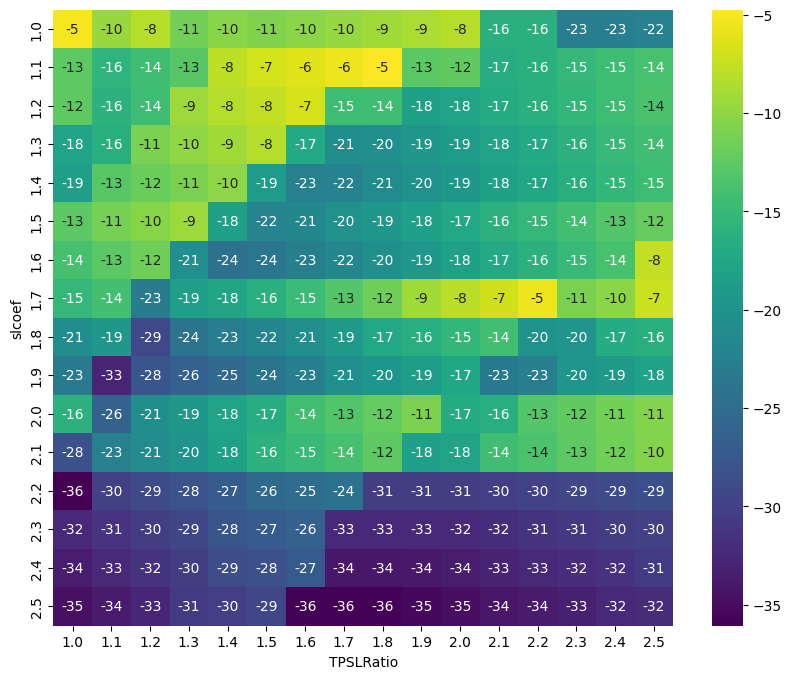

In [62]:
# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()